In [1]:
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import json
import sys

import sys, os
#path2add = os.path.normpath(os.path.abspath(os.path.join(os.path.dirname(__file__), os.path.pardir, 'dir1')))
#print(os.getcwd())
path2add = os.path.normpath(os.path.abspath(os.path.join(os.getcwd(), os.path.pardir)))
#print(path2add)
if (not (path2add in sys.path)) :
    sys.path.append(path2add)
#sys.path.append("C:/Users/grybk/projects/gratbot/theo_chaser_refactor")
from TimeSeries import TimeSeries,TrackData

from LinearPredictors import LinearFBPredictor

data_loc="../logs/"



C:\Users\grybk\projects\gratbot\theo_chaser_refactor\TimeSeries.py:58: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\grybk\projects\gratbot\theo_chaser_refactor\TimeSeries.py:58: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\grybk\projects\gratbot\theo_chaser_refactor\TimeSeries.py:58: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\grybk\projects\gratbot\theo_chaser_refactor\TimeSeries.py:58: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


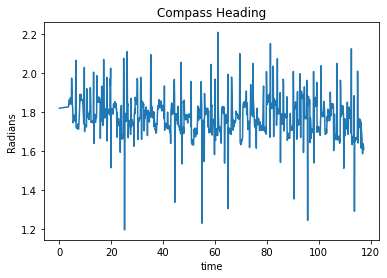

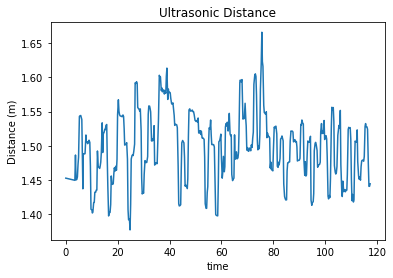

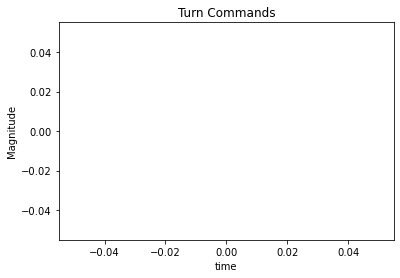

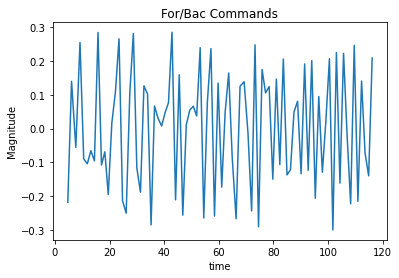

In [2]:
pred=LinearFBPredictor()
headings,dists,turn_commands,fb_commands,tracks=pred.load_log_file(data_loc+"sensor_log_20210122-211503.txt")

headings.plot()
dists.plot()
turn_commands.plot()
fb_commands.plot()

<ipython-input-3-5ac961648524>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-3-5ac961648524>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-3-5ac961648524>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-3-5ac961648524>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-3-5ac961648524>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


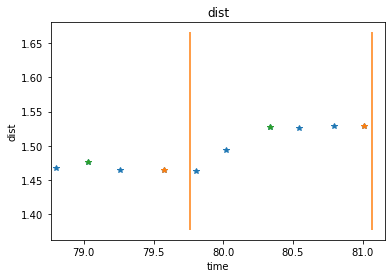

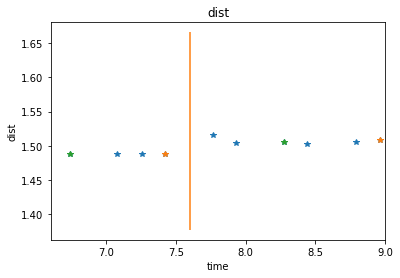

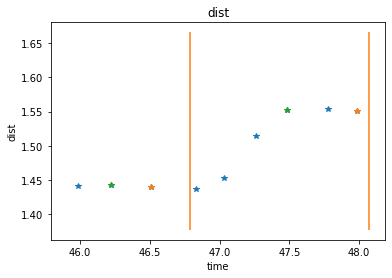

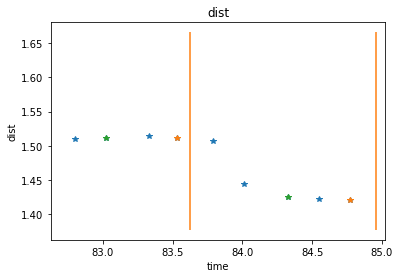

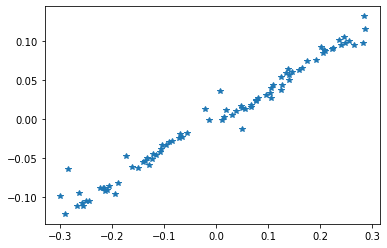

In [3]:
import random
fb_matching,dist_before,dist_after=dists.extract_bracketing_elements(fb_commands,after_time_min=0.55)
delta_dist=TimeSeries(dist_before.times,dist_before.data-dist_after.data)

for i in range(4):
    j=random.choice(range(len(fb_matching)))
    fig, ax = plt.subplots()
    plt.xlim(fb_matching.times[j]-1.0,fb_matching.times[j]+1.4)    
    ax.set(xlabel='time', ylabel='dist',title='dist')
    ax.plot(dists.times,dists.data,'*')
    ax.plot(dist_before.times,dist_before.data,'*')
    ax.plot(dist_after.times,dist_after.data,'*')

    ax.vlines(fb_matching.times,np.min(dists.data),np.max(dists.data),color="C1")
    fig.show()

fig, ax = plt.subplots()    
ax.plot(fb_matching.data,delta_dist.data,'*')
#ax.vlines(turns_t,np.min(headings),np.max(headings),color="C1")
fig.show()

slope 0.39472855114434935
slope unc 0.006660556061135146
inherent unc 0.010497390563769703


<ipython-input-4-f0e3113ba866>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


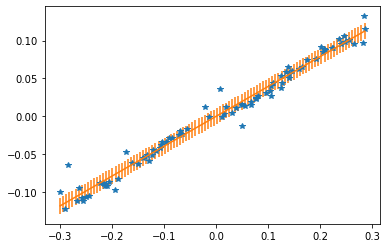

In [4]:
fb_matching,delta_dist=pred.fit_ultra_calibration_from_log(data_loc+"sensor_log_20210122-211503.txt")

print("slope {}".format(pred.ultrasonic_motion_slope))
print("slope unc {}".format(pred.ultrasonic_motion_slope_unc))
print("inherent unc {}".format(pred.ultrasonic_motion_inherent_unc))

test_x=np.linspace(np.min(fb_matching.data),np.max(fb_matching.data),100)
test_y,test_y_unc=pred.predict_ultrasonic_from_motion(test_x)

fig, ax = plt.subplots()
ax.plot(fb_matching.data,delta_dist.data,'*')
ax.errorbar(test_x,test_y,yerr=test_y_unc)
fig.show()    


C:\Users\grybk\projects\gratbot\theo_chaser_refactor\TimeSeries.py:58: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\grybk\projects\gratbot\theo_chaser_refactor\TimeSeries.py:58: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\grybk\projects\gratbot\theo_chaser_refactor\TimeSeries.py:58: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\grybk\projects\gratbot\theo_chaser_refactor\TimeSeries.py:58: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


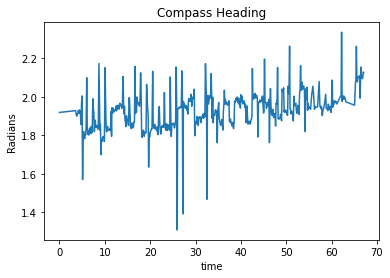

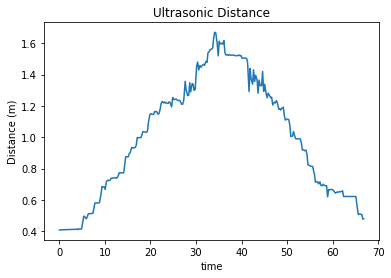

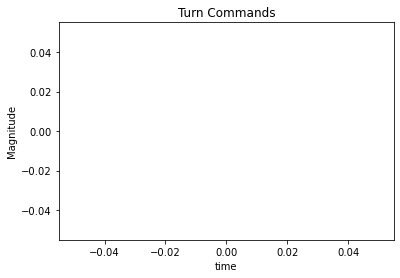

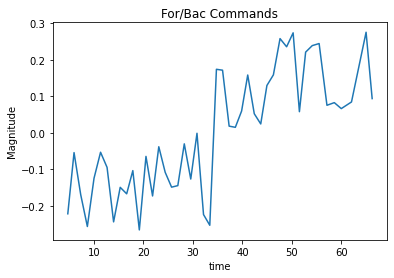

In [5]:
pred=LinearFBPredictor()
headings,dists,turn_commands,fb_commands,tracks=pred.load_log_file(data_loc+"sensor_log_20210122-213314.txt")

headings.plot()
dists.plot()
turn_commands.plot()
fb_commands.plot()


<ipython-input-6-3d86aa80a096>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-6-3d86aa80a096>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-6-3d86aa80a096>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-6-3d86aa80a096>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-6-3d86aa80a096>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-6-3d86aa80a096>:21: UserWarning: Matplotlib is cur

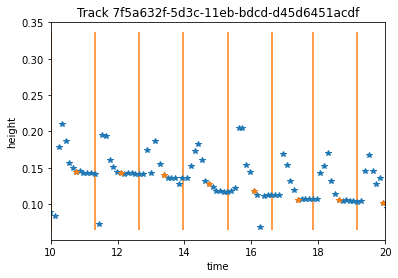

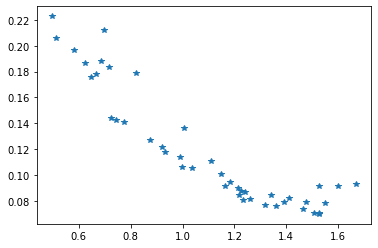

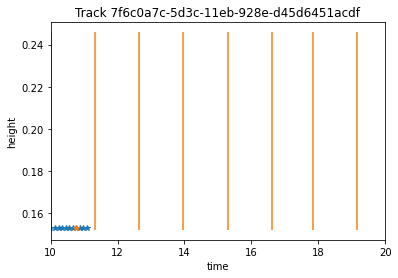

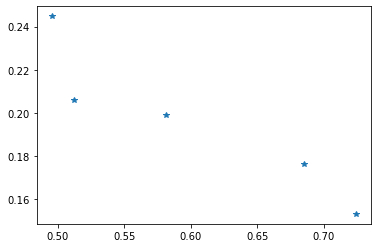

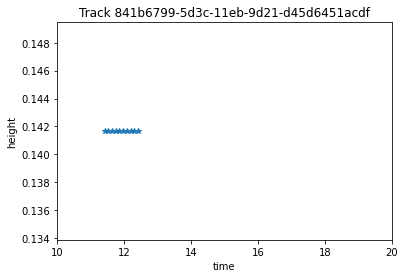

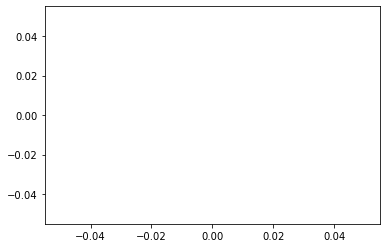

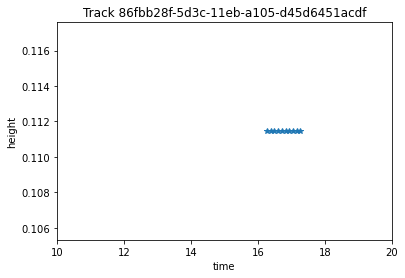

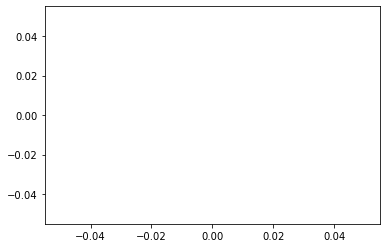

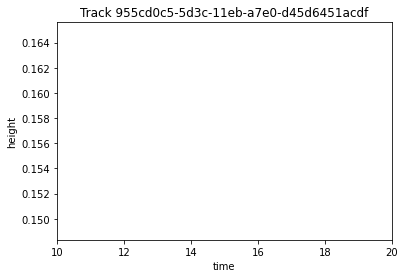

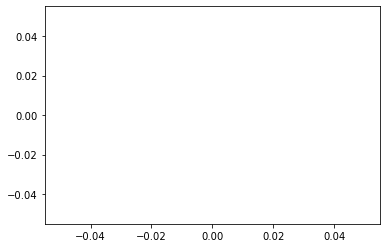

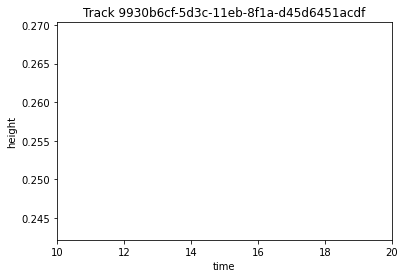

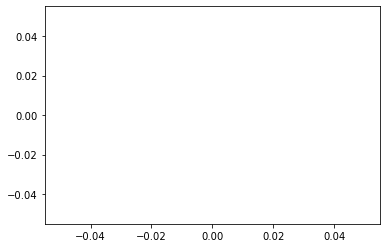

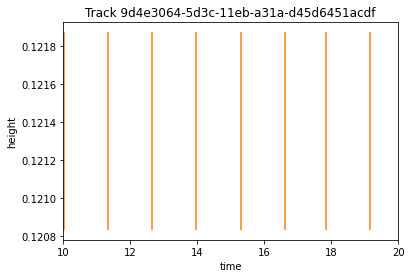

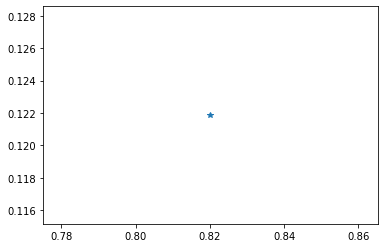

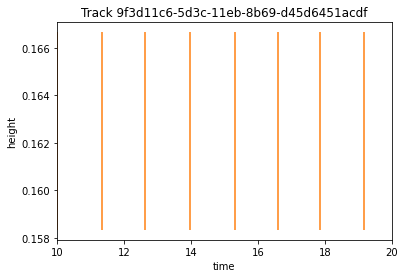

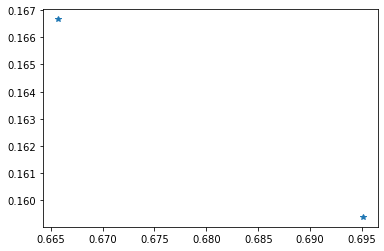

In [6]:
best_dists=[]
best_wh=[]

for key in tracks:
    #print(tracks[key].last_update)
    hseries=TimeSeries(tracks[key].times,np.array(tracks[key].last_update)[:,3])
    hseries_filter=TimeSeries(tracks[key].times,np.array(tracks[key].xywh)[:,3])
    #I want to find times well after I'm done moving
    fb_matching,trackh_before,trackh_after=hseries.extract_bracketing_elements(fb_commands,after_time_min=0.7)
    fig, ax = plt.subplots()
    plt.xlim(np.min(hseries.times),np.max(hseries.times))
    plt.xlim(10,20)
    ax.vlines(fb_commands.times,np.min(hseries.data),np.max(hseries.data),color="C1")
    ax.set(xlabel='time', ylabel='height',title="Track {}".format(key))
    ax.plot(hseries.times,hseries.data,'*')
    ax.plot(trackh_after.times,trackh_after.data,'*')
    #now correlate those to distances
    matching_dists=np.interp(trackh_after.times,dists.times,dists.data)
    fig, ax = plt.subplots()
    ax.plot(matching_dists,trackh_after.data,'*')
    fig.show()    
    if len(matching_dists)>len(best_dists):
        best_dists=matching_dists
        best_hs=trackh_after.data

    

[0.11575903]
0.01374404386410838
0.0019246283431535681


<ipython-input-7-ef89a08eff1b>:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


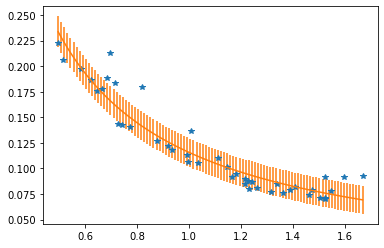

In [7]:
#Theory:   tan(theta)=height/dist  also tan(theta)=theta for all I care
from scipy.optimize import curve_fit 


def fit_fcn2(x,angle_conversion,height):
    return angle_conversion*np.arctan(height/x)
def fit_fcn(x,height):
    return height/x

popt, pcov = curve_fit(fit_fcn, best_dists, best_hs)
sigma=np.sqrt(np.sum((fit_fcn(best_dists,popt[0])-best_hs)**2)/len(best_dists))

print(popt)
print(sigma)
print(np.sqrt(pcov[0][0]))

popt2, pcov2 = curve_fit(fit_fcn2, best_dists, best_hs)

test_x=np.linspace(np.min(best_dists),np.max(best_dists),100)
#test_y=fit_fcn(test_x,popt[0],popt[1])
test_y=fit_fcn(test_x,popt[0])
test_y_unc=np.sqrt( (test_y*(sigma/test_x))**2+sigma*sigma)

fig, ax = plt.subplots()
ax.plot(best_dists,best_hs,'*')
#ax.plot(test_x,test_y)
#ax.plot(test_x,test_y2)
ax.errorbar(test_x,test_y,yerr=test_y_unc)
fig.show()    


[0.58022085]
0.1276657840342853
0.009946879460265571
Field of view equivalent 33.2+/-0.6


<ipython-input-21-3e688550ad5b>:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-21-3e688550ad5b>:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


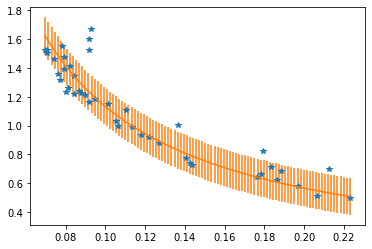

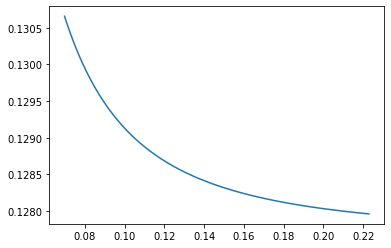

In [21]:
#lets do it the other way round, that's how I'll use it more often
#known_height=0.08
known_height=0.195

from uncertainties import ufloat

#predict distance given x and an angle conversion
def fit_fcn(x,b):
    return b*known_height/x

popt, pcov = curve_fit(fit_fcn, best_hs, best_dists)
sigma=np.sqrt(np.sum((fit_fcn(best_hs,popt[0])-best_dists)**2)/len(best_dists))

print(popt)
print(sigma)
print(np.sqrt(pcov[0][0]))
unc=np.sqrt(pcov[0][0])


print("Field of view equivalent {}".format(360*ufloat( popt[0],np.sqrt(pcov[0][0]))/(2*np.pi)))

test_x=np.linspace(np.min(best_hs),np.max(best_hs),100)
test_y=fit_fcn(test_x,popt[0])
test_y_unc=np.sqrt( (test_y*(unc/popt[0]))**2+sigma*sigma)

fig, ax = plt.subplots()
ax.plot(best_hs,best_dists,'*')
#ax.plot(test_x,test_y)
ax.errorbar(test_x,test_y,yerr=test_y_unc)
fig.show()    
#fractional error
fig, ax = plt.subplots()
ax.plot(test_x,test_y_unc)
fig.show()

factor is 0.6981317007977318


<ipython-input-34-6d33a93f8a9a>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


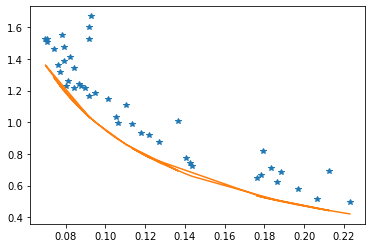

In [34]:
def predict_distance(y_height,object_height):
    #camera_hfov=48.8*(2*np.pi)/360 #from spec sheet
    camera_hfov=48.8*(2*np.pi)/360 #from spec sheet
    #return object_height*(camera_hfov/y_height)
    return object_height/np.tan(y_height*camera_hfov)

#camera_hfov=48.8*(2*np.pi)/360 #from spec sheet

print("factor is {}".format(camera_hfov))
#obj_height=0.195
obj_height=0.081
fig, ax = plt.subplots()
ax.plot(best_hs,best_dists,'*')
ax.plot(best_hs,predict_distance(best_hs,obj_height))
#ax.plot(test_x,test_y)
#ax.errorbar(test_x,test_y,yerr=test_y_unc)
fig.show()    

In [22]:
camera_hfov=48.8*(2*np.pi)/360 #from spec sheet
camera_wfov=62.2*(2*np.pi)/360 #from spec sheet